# Pricipal component analysis

In this exercise, we are performing dimensionality reduction using principal component analysis (PCA) for circadian gene expression data set from the study “Circadian Enhancers Coordinate Multiple Phases of Rhythmic Gene Transcription In Vivo” by Fang et al (https://doi.org/10.1016/j.cell.2014.10.022). 

## Importing libraries 

The first step is to import the required Python libraries.

In [2]:
# Import libraries:

# To read, write and process tabular data:
import pandas as pd 

# For efficient manipulation of matrices (and more):
import numpy as np 

# For machine learning:
from sklearn import preprocessing
from sklearn.decomposition import PCA

# For visualization:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
import plotly.offline as offline
offline.init_notebook_mode()

ModuleNotFoundError: No module named 'plotly'

## Loading data

The data is available in NCBI GEO database (https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE59486, accession id GSE59486).

In [ ]:
# The expression data extracted from GEO is saved to https://github.com/oercompbiomed/Module-1/expression_oscillating_genes.csv
# Copy the data to your own folder

# Check your current working folder if necessary:
import os
os.getcwd()


In [ ]:
# Type the correct file path and remove # sign to read in the expression data file
df= pd.read_csv('data/expression_oscillating_genes.csv')

# Check that the file looks ok
df.head()

In [ ]:
# We want to plot the time points rather than the genes - check whether the transpose of the matrix suits better for this
df.T.head()

In [ ]:
# Remove the row of gene names
df = df.T
df = df.drop(['Gene Name'])

df.head()

In [ ]:
# Save the time point names for plotting graph later

#To save column names type
#a=list(df)
#To save row names type
a=df.index.values

# Which ones do you choose? Remove # sign and run

In [ ]:
# The results of PCA depend on the scaling of the variables, so it is important to standardize the data. Here we use
# preprocessing.scale from sklearn package to transform the data to mean=0, Variance=1.

scaled = preprocessing.scale(df)
# If you want to see the scaled values, type
# print(scaled)

#### Exercise 1. We just scaled each row to zero mean and unit variance. Verify that your data is normalized.

In [ ]:
# %load solutions/ex1_1.py

means = scaled.mean(axis=0) # axis 0 means rows
stds = scaled.std(axis=0)

print(np.allclose(means, 0))  # checks if all are 0 within an error threshold (floating point errors will always occur)
print(np.allclose(stds, 1)) # checks if all stds or equivalently variances are 1

More on feature scaling in [this sklearn tutorial](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)

## What are principal components?

The idea behind PCA is fairly intuitive: identify the direction of maximal variation in your data. Set this "arrow" as a new axis. Repeat this procedure $d$ times, with the restriction that each new axis must be [orthogonal](https://en.wikipedia.org/wiki/Orthogonality) to the others. The coordinates of the points in this new projection space is the transformed, decomposed data. We will recreate the figure below.

<img src="assets/PCA_illustration.png">

First make some synthetic data


In [ ]:
from sklearn.datasets import make_blobs
# make synthetic data
X,y = make_blobs(centers=1, random_state=1)
trns = [[.1,.3],[0,.15]]
X=X@trns
X_sc = preprocessing.scale(X)

def scatter(X, y=None):
    fig=plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow_r')
    return fig

scatter(X_sc)

## Computing Principal Components

To know more about the available parameters in sklearn.decomposition package for PCA see https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.
Here we first call the PCA() function from sklearn.decomposition library. This object is then used to fit the PCA model to the data and finally the dimensionality reduction is applied to the data to project the data on the principal components.

Again, remember the sklearn workflow : instantiate -> fit -> apply (transform or predict)

In [ ]:
pca = PCA(2) # instantiate a PCA object / model
pca.fit(X_sc) # fit PCA model on the scaled data
X_tr = pca.transform(X_sc) # apply the dimensionality reduction on the data

In [ ]:
# don't worry too much about the code, just know the principal components are encoded in 
# pca.components_ and pca.explained_variance_ (for magnitude)

plt.figure(figsize=(7,6))
scatter(X_sc)
plt.arrow(0, 0, *pca.components_[0]*pca.explained_variance_[0], color='r', lw=3)
plt.arrow(0, 0, *pca.components_[1]*pca.explained_variance_[1], color='r', lw=3)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Principal components')
plt.show()

scatter(X_tr)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('Transformed')

#### Exercise 2. Verify that the eigenvectors (principal components) are orthogonal.

If you don't know how to do that, just google it.

In [ ]:
# %load solutions/ex1_2.py

# according to wikipedia: 
# Two vectors, x and y, in an inner product space, V, 
# are orthogonal if their inner product ⟨ x , y ⟩ is zero

fst = pca.components_[0]
snd = pca.components_[1]

print(fst, snd)
np.inner(fst, snd)

# fst@snd also works
# as well does pca.components_ @ pca.components_, yielding the identity matrix

Now we return to the real world data example.

In [ ]:
pca = PCA(8)
pca.fit(scaled)
pca_data = pca.transform(scaled)

## Drawing scree Plots

Scree plots show the number of principal components on the x axis and their corresponding eigen values or percentage of explained variance on the y-axis. It is a decreasing curve as the first principal components account for most of the variance.

In [ ]:
# Draw a scree plot of the explained variance by PCs
 
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1) # Computing the magnitude of each bar(PCA component) on scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] # Creating labels for x axis
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

# To plot the explained variance:
plt.show()

In the following graph we will decompose the data into 8 principal components and show what percentage of variance is explained by the 8 principal components and their corresponding cumulative variance. Hover over each bar to get the actual magnitude of explained and cumulative variance explained.

In [ ]:
# Perform dimensionality reduction into 8 components and draw an interactive scree plot

# PCA analysis
components = 8
pca = PCA(n_components=components) # Creating the PCA object
Y = pca.fit(scaled)
var_exp = Y.explained_variance_ratio_ # This is the ratio of the variance explained by each principal component
cum_var_exp = np.cumsum(var_exp)

# Plot the explained variance:

#trace 1 is the data for explained variance of each component
x = ["PC%s" %i for i in range(1,components)]
trace1 = go.Bar(
    x=x,
    y=list(var_exp),
    name="Explained Variance")

#trace 2 is data for cumulative variance
trace2 = go.Scatter(
    x=x,
    y=cum_var_exp,
    name="Cumulative Variance")

#Set title and xaxis labels
layout = go.Layout(
    title='Explained variance',
    xaxis=dict(title='Principal Components', tickmode='linear'))

# Plot the figure
data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

As you can see, the first component accounts for maximum variance and the corresponding ones have decreasing values.


## Creating PCA scatter plots

Matplotlib was initially designed with only two-dimensional plotting. 3D plots are enabled by importing the **mplot3d to** toolkit, after which a three-dimensional axes can be created by passing the keyword **projection='3d'** to any of the normal axes creation routines.

### Creating a 3D PCA plot 

In this case, the first 3 principal components explain 83 percent of the variance. Let's plot the projection to a 3D graph to see how it looks like.

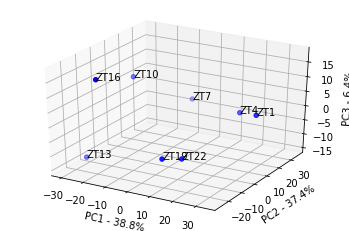

In [20]:
# Create a 3D plot of data points projected on three PCs

#We saved a list of data point names - use that as index and remove # sign
pca_df = pd.DataFrame(pca_data, index=a, columns=labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


xs = pca_df.PC1
#How would you define the y and x axis based on the line above? Remove # sign and run
ys = pca_df.PC2
zs = pca_df.PC3
ax.scatter(xs, ys, zs, c='b', marker='o')
 
    
ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var[2]))

for sample in pca_df.index:
    ax.text(pca_df.PC1.loc[sample], pca_df.PC2.loc[sample], pca_df.PC3.loc[sample], sample)
    #plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample], pca_df.PC3.loc[sample]))


# Plot the figure
plt.show()


In this case it's not so easy to see the behaviour of the data from the 3D plot, so let's still simplify our visualization by using only the first 2 PCs.

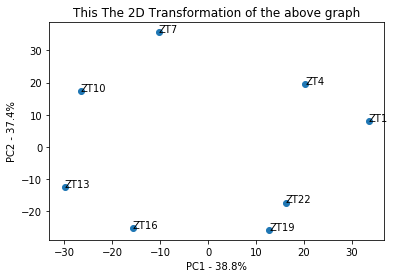

In [21]:
# Drawing a 2D plot is much more simple than the code above using plt.scatter, which creates a 2D scatter plot of y vs x
# Draw a 2D plot of the data points projected on the first 2 principal components

#Remind yourself first what we have in the object pca_df
 
# Define the 1st and 2nd principal components to the following code based on the previous graph, remove # sign and run
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('This The 2D Transformation of the above graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

# To show the PCA 2D plot
plt.show()

Do you see now the circadian gene expression?